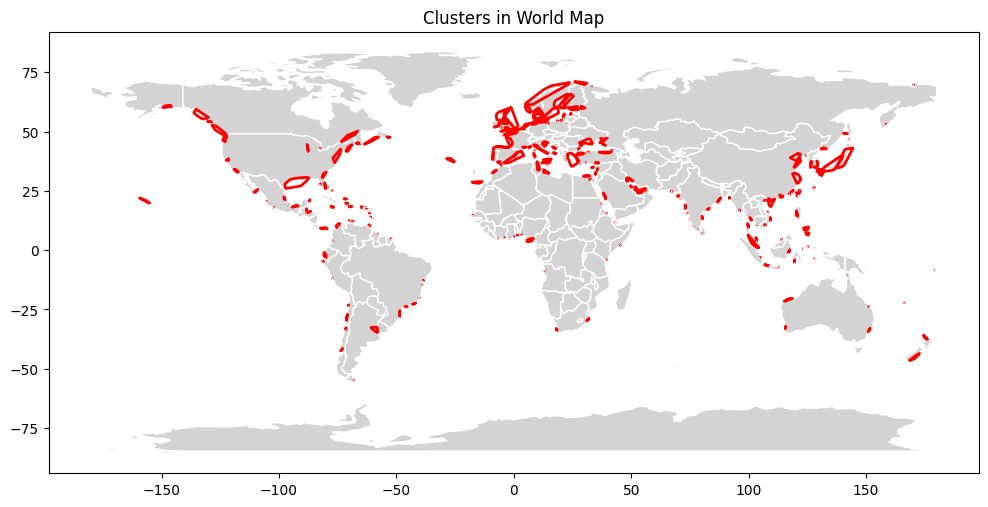

     label                                           geometry  ship_cnts  \
0        0  POLYGON ((119.42672 34.65604, 119.42651 34.656...      10000   
1        1  POLYGON ((13.73057 45.55048, 13.72945 45.5529,...        524   
2        2  POLYGON ((27.60619 37.25405, 26.89543 38.74374...        893   
3        3  POLYGON ((25.14214 35.34377, 24.4783 35.37266,...       1477   
4        4  POLYGON ((33.5772 44.61251, 33.5326 44.61268, ...       7021   
..     ...                                                ...        ...   
260    260  POLYGON ((128.17298 -3.69974, 128.17294 -3.699...        157   
261    261  POLYGON ((123.06256 0.5063, 123.06254 0.50632,...        155   
262    262  POLYGON ((125.21317 1.43807, 125.19387 1.43807...         51   
263    263  POLYGON ((179.17903 -8.5198, 179.17829 -8.5195...        897   
264    264  POLYGON ((-73.73975 -42.64532, -73.75745 -42.6...        140   

                                    country_water_body           nearest_ports  
0     

In [1]:
import pandas as pd
import geopandas as gpd
from shapely import wkb
import matplotlib.pyplot as plt

# 读取 feather 文件（注意相对路径）
# df = pd.read_feather('../Network Analysis/result/clusters/cl_tmp.feather')
df = pd.read_feather('../Network Analysis/result/clusters/cl_01-03.feather')

# 将二进制的 geometry 列转换为 shapely 几何对象
df['geometry'] = df['geometry'].apply(wkb.loads)

# 构造 GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)

# 从本地加载世界地图数据
world = gpd.read_file('data/countries.geo.json')

# 绘制世界地图和叠加多边形
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgray', edgecolor='white')
gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)
plt.title("Clusters in World Map")
plt.show()

print(gdf)